# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [1]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
# Your code here
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [5]:
# Your code here - drop columns with missing data
ames = ames.dropna(axis=1, how='any')

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

In [8]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

### Continuous Numeric Predictor

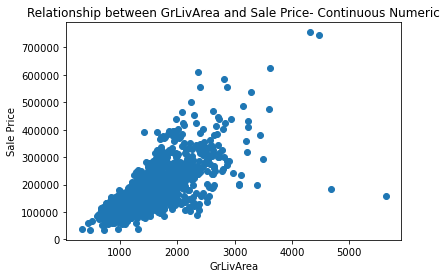

In [13]:
# Your code here - continuous numeric predictor
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(ames['GrLivArea'] , ames['SalePrice'])
ax.set_title('Relationship between GrLivArea and Sale Price- Continuous Numeric')
ax.set_ylabel('Sale Price')
ax.set_xlabel('GrLivArea');

### Discrete Numeric Predictor

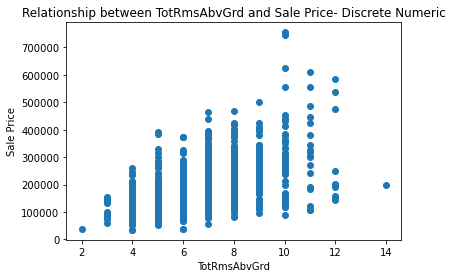

In [14]:
# Your code here - discrete numeric predictor
fig, ax = plt.subplots()

ax.scatter(ames['TotRmsAbvGrd'] , ames['SalePrice'])
ax.set_title('Relationship between TotRmsAbvGrd and Sale Price- Discrete Numeric')
ax.set_ylabel('Sale Price')
ax.set_xlabel('TotRmsAbvGrd');

### String Categorical Predictor

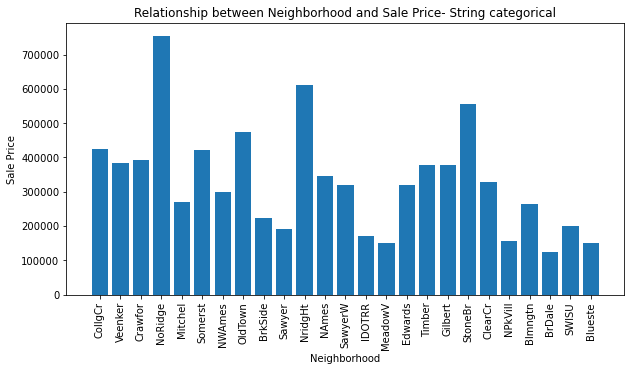

In [23]:
# Your code here - string categorical predictor
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(ames['Neighborhood'] , ames['SalePrice'])
ax.set_title('Relationship between Neighborhood and Sale Price- String categorical')
ax.set_ylabel('Sale Price')
ax.set_xlabel('Neighborhood')
plt.xticks(rotation=90);

### Discrete Categorical Predictor

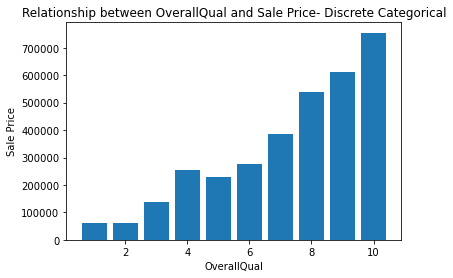

In [16]:
# Your code here - discrete categorical predictor
fig, ax = plt.subplots()

ax.bar(ames['OverallQual'] , ames['SalePrice'])
ax.set_title('Relationship between OverallQual and Sale Price- Discrete Categorical')
ax.set_ylabel('Sale Price')
ax.set_xlabel('OverallQual');

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [26]:
# Your code here - prepare X and y, including one-hot encoding
y = ames['SalePrice']
x = ames[['GrLivArea', 'TotRmsAbvGrd', 'OverallQual']]
x = pd.get_dummies(x, columns=['OverallQual'], drop_first=True, dtype=int)
x

,GrLivArea,TotRmsAbvGrd,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
Id,,,,,,,,,,,
1,1710,8,0,0,0,0,0,1,0,0,0
2,1262,6,0,0,0,0,1,0,0,0,0
3,1786,6,0,0,0,0,0,1,0,0,0
4,1717,7,0,0,0,0,0,1,0,0,0
5,2198,9,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1456,1647,7,0,0,0,0,1,0,0,0,0
1457,2073,7,0,0,0,0,1,0,0,0,0
1458,2340,9,0,0,0,0,0,1,0,0,0


In [28]:
# Your answer here - which category or categories were dropped?
'''
I dropped the overall quality of 1 as my reference category
'''

In [28]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     418.7
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:47:29   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1448   BIC:                         3.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.135e+04   2.77e+04      0.772      0.440   -3.29e+04    7.56e+04
GrLivArea         60.7403      4.012     15.141      0.000      52.871      68.609
TotRmsAbvGrd   -2932.7774   1141.921     -2.568      0.010   -5172.774    -692.781
OverallQual_2   6389.8172   3.56e+04      0.179      0.858   -6.35e+04    7.63e+04
OverallQual_3   1.545e+04    2.9e+04      0.533      0.594   -4.14e+04    7.23e+04
OverallQual_4   3.598e+04   2.79e+04      1.291      0.197   -1.87e+04    9.07e+04
OverallQual_5   5.388e+04   2.77e+04      1.943      0.052    -514.286    1.08e+05
OverallQual_6   6.981e+04   2.78e+04      2.515      0.012    1.54e+04    1.24e+05
OverallQual_7   1.032e+05   2.78e+04      3.709      0.000    4.86e+04    1.58e+05
OverallQual_8   1.569e+05   2.79e+04      5.613      0.000    1.02e+05    2.12e+05
OverallQual_9   2.442e+05   2.85e+04      8.576      0.000    1.88e+05       3e+05
OverallQual_10  2.625e+05   2.97e+04      8.850      0.000    2.04e+05    3.21e+05
==============================================================================
Omnibus:                      448.577   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21522.299
Skew:                          -0.644   Prob(JB):                         0.00
Kurtosis:                      21.765   Cond. No.                     1.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

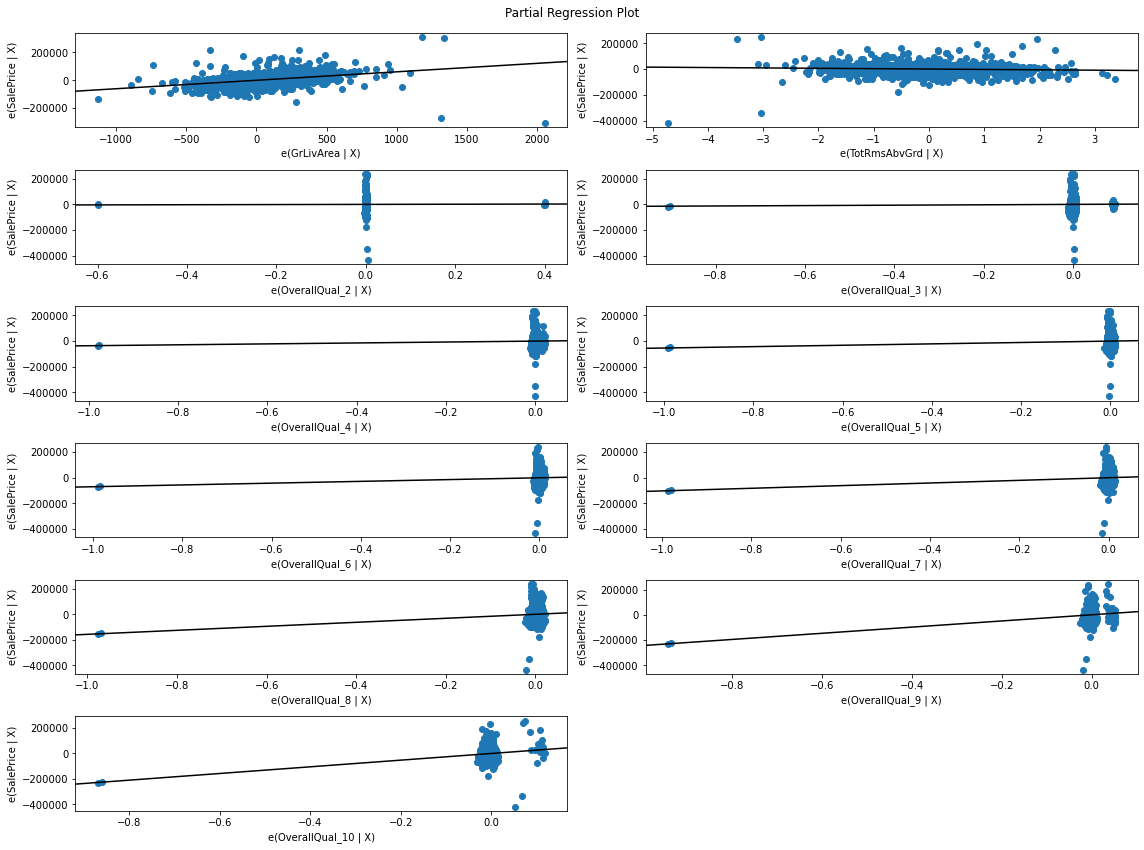

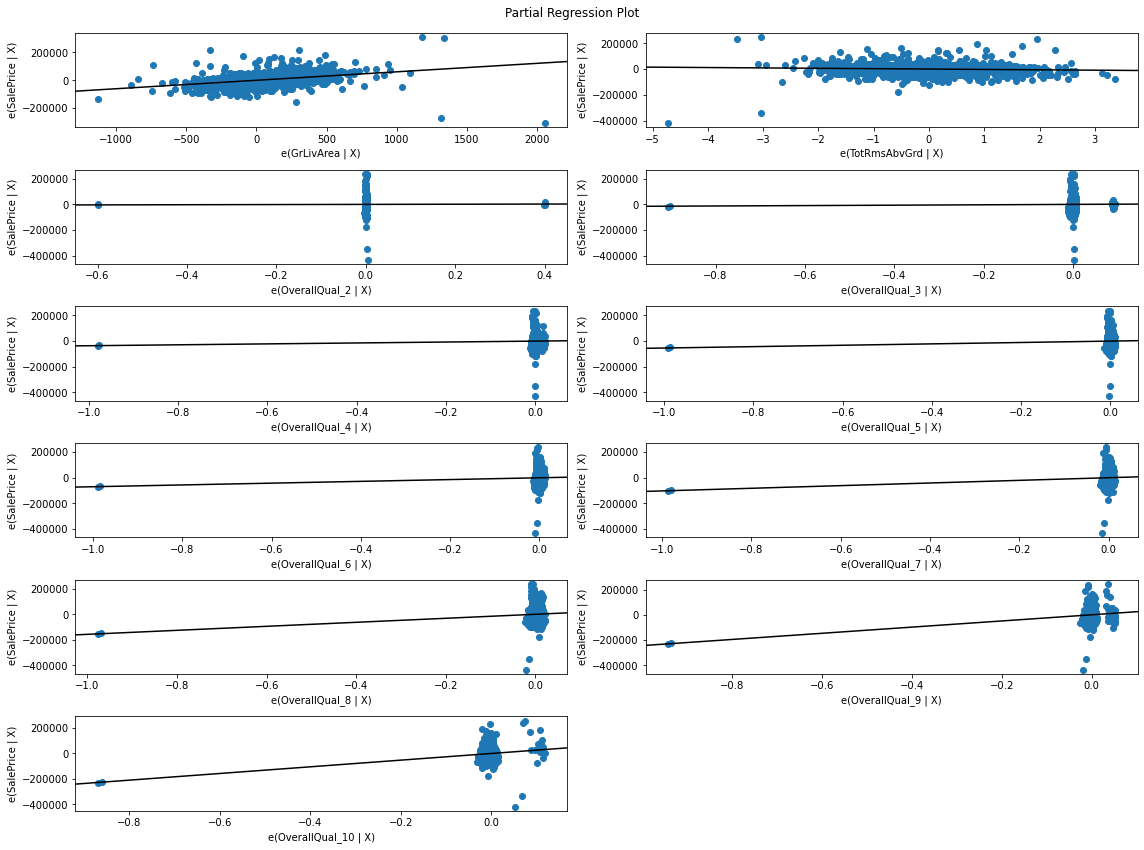

In [38]:
# Your code here - create partial regression plots
fig=plt.figure(figsize=(16, 12))
               
sm.graphics.plot_partregress_grid(model, exog_idx=['GrLivArea', 'TotRmsAbvGrd', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10'], fig=fig)

## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [39]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(sm.add_constant(x))
                       
MAE = mean_absolute_error(y, y_pred)
RMSE = mean_squared_error(y, y_pred, squared=False)

MAE, RMSE

(25868.045528935243, 38841.184458136595)

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
'''
based on the fstatistic p-value the model is statistically significant with a 76% adjusted R2, 
which is the variance of the variables in SalePrice. 
however the MSE and RMSE are quite high meaning there is room for improvement.
'''

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [42]:
# Your code here
from sklearn.linear_model import LinearRegression

model2 = LinearRegression().fit(x, y)

print(f' R-squared is:{model2.score(x,y)}')

 R-squared is:0.7607914726021474


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.